In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('data/train.csv')

In [4]:
train.head()

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1


In [5]:
train.shape

(30083, 13)

In [6]:
import PIL
def getimg(UID):
    return (PIL.Image.open(f'data/train/{UID}.jpg'))

In [7]:
from IPython.display import Image
def showimg(UID):
    display(Image(f'data/train/{UID}.jpg'))

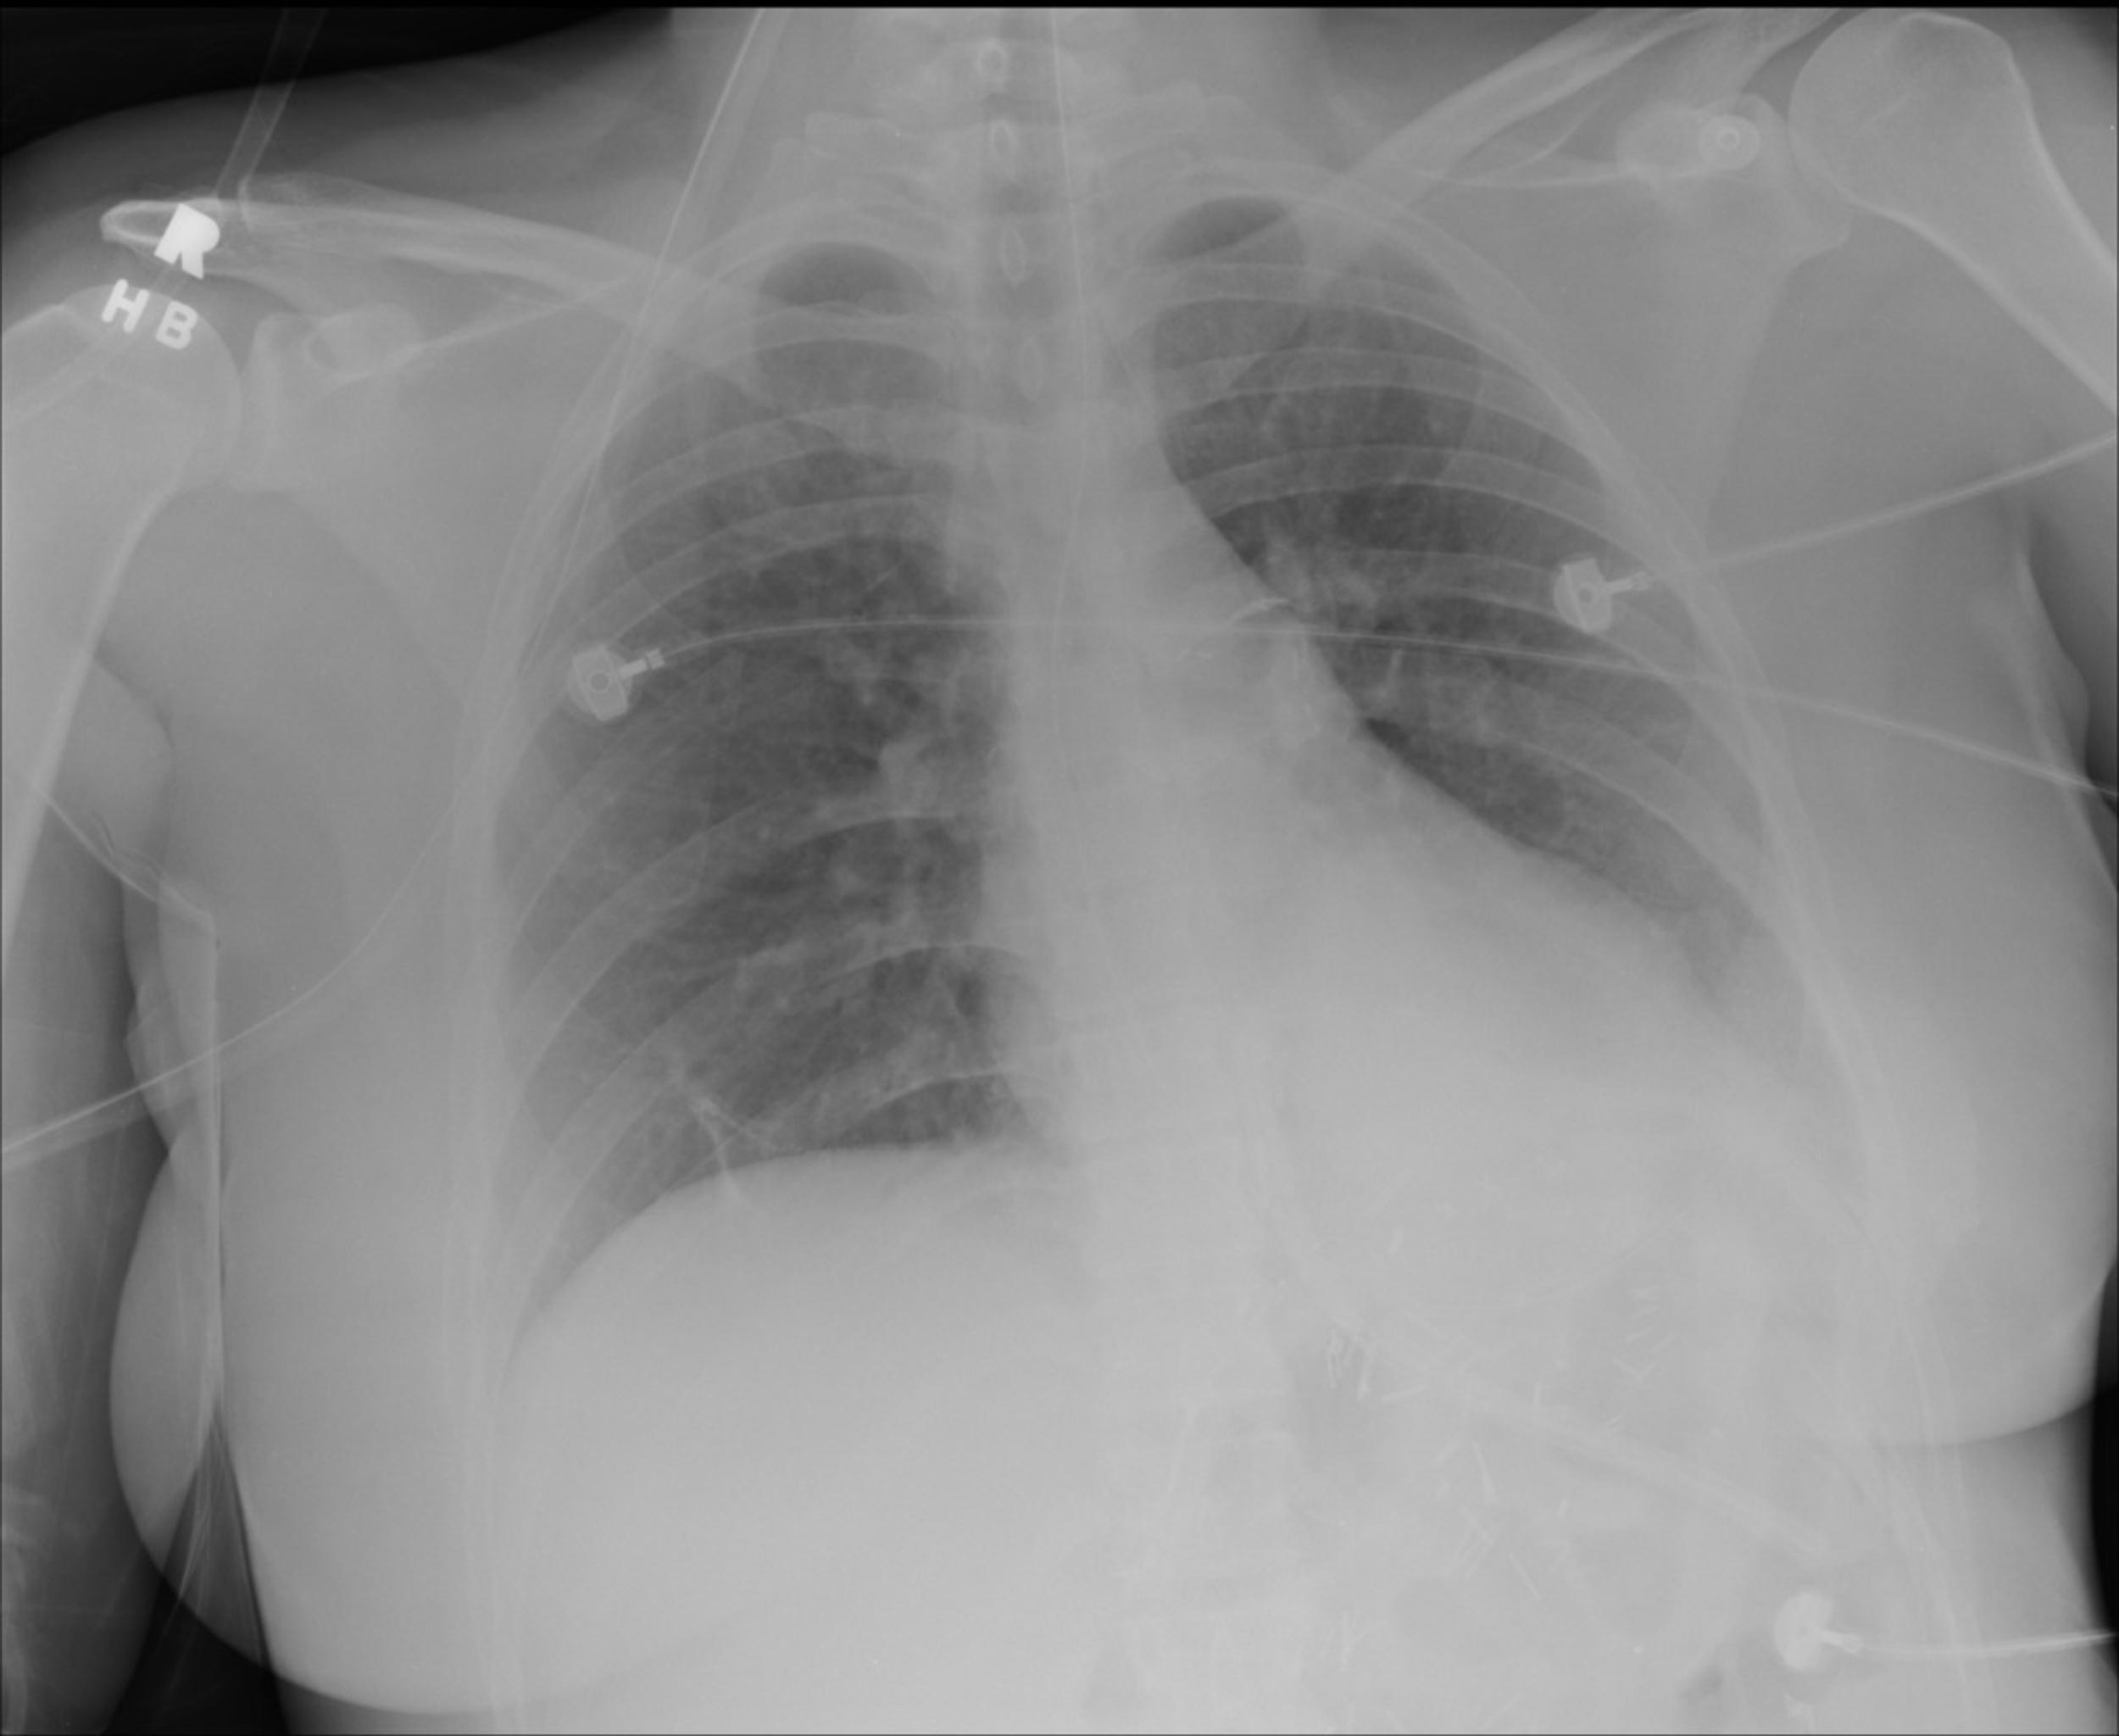

In [8]:
showimg(train['StudyInstanceUID'][0])

In [9]:
img = getimg(train['StudyInstanceUID'][0])
np.asarray(img).shape

(2048, 2500)

In [53]:
import pandas_profiling

In [61]:
pandas_profiling.ProfileReport(train)

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
len(train['PatientID'].unique())

3255

We can see we have only 3255 patient on the Dataset

In [36]:
train['PatientID'].value_counts()

05029c63a    172
55073fece    167
26da0d5ad    148
8849382d0    130
34242119f    110
            ... 
6e3d923eb      1
0be5b8462      1
9d76167f4      1
7755053cb      1
5ed7f70af      1
Name: PatientID, Length: 3255, dtype: int64

In [48]:
train['PatientID'].value_counts().describe()

count    3255.000000
mean        9.242089
std        12.624028
min         1.000000
25%         3.000000
50%         5.000000
75%        10.000000
max       172.000000
Name: PatientID, dtype: float64

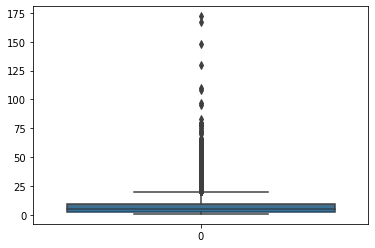

In [47]:
import seaborn as sns
sns.boxplot(data=train['PatientID'].value_counts());

In [41]:
train['PatientID'].value_counts().describe()

count    3255.000000
mean        9.242089
std        12.624028
min         1.000000
25%         3.000000
50%         5.000000
75%        10.000000
max       172.000000
Name: PatientID, dtype: float64

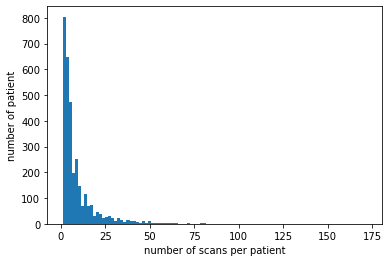

In [39]:
plt.hist(train['PatientID'].value_counts(), bins=100)
plt.xlabel('number of scans per patient')
plt.ylabel('number of patient')
plt.show()

In [52]:
categories = train.columns
categories

Index(['StudyInstanceUID', 'ETT - Abnormal', 'ETT - Borderline',
       'ETT - Normal', 'NGT - Abnormal', 'NGT - Borderline',
       'NGT - Incompletely Imaged', 'NGT - Normal', 'CVC - Abnormal',
       'CVC - Borderline', 'CVC - Normal', 'Swan Ganz Catheter Present',
       'PatientID'],
      dtype='object')

In [ ]:
train['EET'] = (train.iloc[:,1:4]==1).any(axis=1).apply(lambda x: 1 if x else 0)
train['NGT'] = (train.iloc[:,4:8]==1).any(axis=1).apply(lambda x: 1 if x else 0)
train['CVC'] = (train.iloc[:,8:11]==1).any(axis=1).apply(lambda x: 1 if x else 0)

In [ ]:
train[((train.iloc[:,1:4]==1).sum(axis=1) > 1)].shape[0]

In [ ]:
train[((train.iloc[:,4:8]==1).sum(axis=1) > 1)].shape[0]

In [ ]:
train[((train.iloc[:,8:11]==1).sum(axis=1) > 1)].shape[0]

In [ ]:
plt.figure(figsize=(10,10))
corr = train.iloc[:,1:11].corr(method='spearman')
mask = np.tril(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot=True, fmt=".2f", mask=mask, square=True)
plt.title('Correlation between selected features')
plt.tight_layout()
plt.show()

In [ ]:
train.iloc[:,1:4].sum().plot.bar()
plt.title('EET')
plt.show()

In [ ]:
train.iloc[:,4:8].sum().plot.bar()
plt.title('NGT')
plt.show()

In [ ]:
train.iloc[:,8:11].sum().plot.bar()
plt.title('CVC')
plt.show()